#### Import Packages

In [1]:
import pandas as pd
import pickle
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from openai import OpenAI
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity

from utils.system import *
from class_data.data import Data
from class_generate.gen_index import GenIndex
from class_eval.eval_index import EvalIndex

import warnings
warnings.filterwarnings('ignore')

#### Load Data

In [2]:
# Load openai embeddings
wsj_openai = Data(folder_path=get_format_data() / 'openai', file_pattern='wsj_emb_openai_*')
wsj_openai = wsj_openai.concat_files()

In [3]:
# Load articles
wsj_art = Data(folder_path=get_format_data() / 'token', file_pattern='wsj_tokens_*')
wsj_art = wsj_art.concat_files()

#### Embedding Plot

In [4]:
%matplotlib inline

In [5]:
# Params
type = 'embedding'
vector_column = 'ada_embedding'
interval = 'M'
art_col = 'body_txt'
eval_col = 'eval'

------------------------------------------------------------
Here is the query: 
{'label': "Environmental, Social, and Corporate Governance (ESG) principles. Sustainable and responsible investing. Corporate social responsibility. Non-financial accounting. Sustainable economic development. Environmental stewardship in corporate practices. Social equity and fairness in business operations. Good governance, ethics, and transparency in companies' organizational structures and strategies.", 'start_date': '1984-01-02', 'end_date': '2021-12-31'}
------------------------------------------------------------
Number of 1: 45/456
Number of 2: 74/456
Number of 3: 19/456
Number of 4: 78/456
Number of 5: 240/456


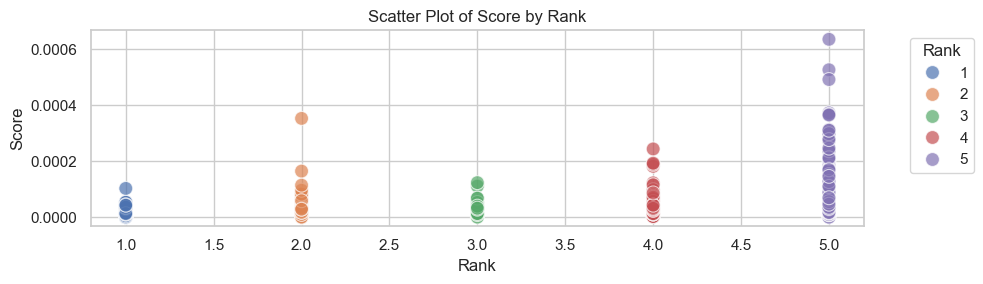

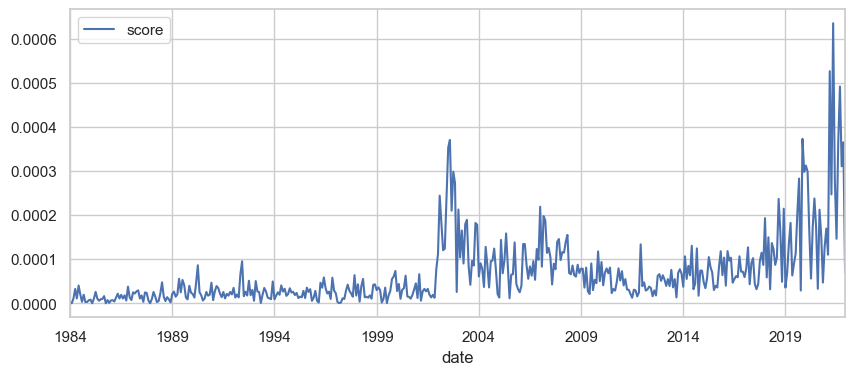

In [15]:
query = 'Generate an index with label ESG from 1984-01-02 to 2021-12-31'
generate = GenIndex(query=query, 
                    type=type, 
                    vector_data=wsj_openai, 
                    vector_column=vector_column, 
                    article_data=wsj_art, 
                    interval=interval, 
                    threshold=0.77,
                    alpha=0)
esg = generate.generate_emb()
eval_index = EvalIndex(index=esg, label=generate.query['label'], art_col=art_col, eval_col=eval_col, batch_size=1)
eval_esg = eval_index.eval_articles()
eval_index.count(eval_esg)
esg[['score']].plot(figsize=(10,4))
eval_esg.to_parquet(get_format_data() / 'eval' / 'eval_esg.parquet.brotli', compression='brotli')

In [42]:
eval_esg.loc[eval_esg['eval'] == 5].iloc[80]['body_txt']

'LONDON  Schroders PLC plans to introduce socalled ethical investing practices in response to new United Kingdom pension laws that take effect next month. Continuing a recent U.K. trend toward adding environmental social and ethical criteria in managed investing Schroders expects such concerns to become much more mainstream than in the last 10 years as a result of the governments new legislation says Jim Tennant a director at Schroders an investment management firm. The bulk of our pensionfund clients want to state that they do take account of socially responsible issues. In the U.K. the retail market for ethical investment has grown to GBP 2.8 billion 4.2 billion as of February from GBP 1.7 billion in January 1998 while the number of ethical funds throughout the U.K. and Europe has more than doubled to 36 in the past five years according to Standard  Poors Micropal. So what is ethical investing The general investment practice is to avoid companies that cause identifiable harm  such as

Here is the query: 
{'label': "United States Economic Policy Uncertainty, US economic unpredictability, uncertainty in American fiscal policy, vagueness in US financial strategies, instability in United States economic plans, ambiguity in the American economical guideline, USA's financial plan uncertainty, ambivalence of US economic policies, changeability of United States business plans, risk factor in the US economy policies.", 'start_date': '1984-01-02', 'end_date': '2021-12-31'}
------------------------------------------------------------
Getting query vector...
------------------------------------------------------------
Computing cosine similarity with label embedding...
------------------------------------------------------------
Pearson Correlation with EPU: 0.5110673178954259
Spearman Correlation with EPU: 0.6033962183960915


<Axes: xlabel='date'>

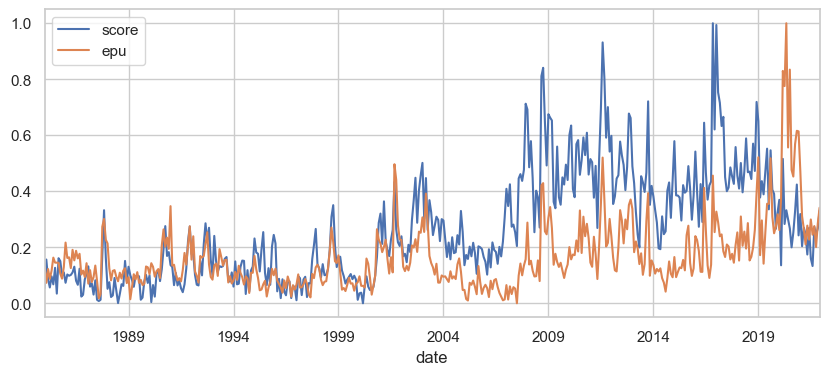

In [41]:
query = 'Generate an index with label United States Economic Policy Uncertainty from 1984-01-02 to 2021-12-31'
generate = GenIndex(query=query, 
                    type=type, 
                    vector_data=wsj_openai, 
                    vector_column=vector_column, 
                    article_data=wsj_art, 
                    interval=interval, 
                    threshold=0.77,
                    alpha=0)
epu = generate.generate_emb()
epu_official = pd.read_parquet(get_format_data() / 'epu.parquet.brotli')
epu = epu.join(epu_official).dropna()
scaler = MinMaxScaler(feature_range=(0, 1))
data_to_scale = epu[['score', 'epu']]
scaled_data = scaler.fit_transform(data_to_scale)
epu[['score', 'epu']] = scaled_data
print("-"*60)
pearson_corr = epu['score'].corr(epu['epu'], method='pearson')
spearman_corr = epu['score'].corr(epu['epu'], method='spearman')
print(f"Pearson Correlation with EPU: {pearson_corr}")
print(f"Spearman Correlation with EPU: {spearman_corr}")
epu[['score', 'epu']].plot(figsize=(10,4))

Here is the query: 
{'label': 'Impact of US-China trade war, International trade disputes between US and China, Evolution of the US-China trade conflict, Understanding the trade wars, Analysis of US-China economic tensions, Shifts in the global market due to the US-China trade war', 'start_date': '1984-01-02', 'end_date': '2021-12-31'}
------------------------------------------------------------
Getting query vector...
------------------------------------------------------------
Computing cosine similarity with label embedding...


<Axes: xlabel='date'>

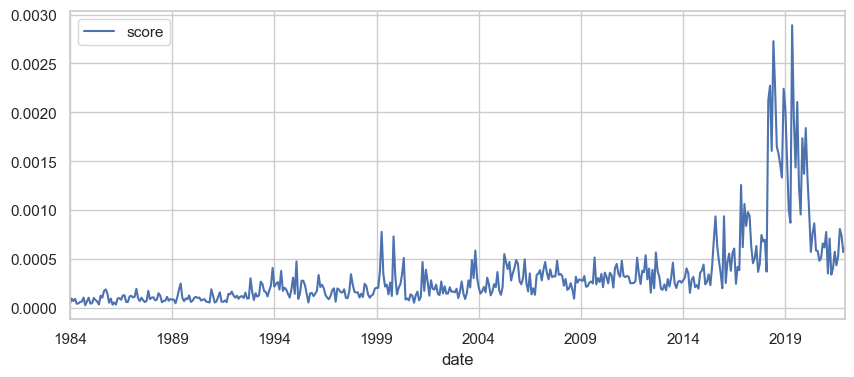

In [22]:
query = 'Generate an index with label US-China trade war from 1984-01-02 to 2021-12-31'
generate = GenIndex(query=query, 
                    type=type, 
                    vector_data=wsj_openai, 
                    vector_column=vector_column, 
                    article_data=wsj_art, 
                    interval=interval, 
                    threshold=0.77,
                    alpha=0)
trade_war = generate.generate_emb()
trade_war.plot(figsize=(10,4))

Here is the query: 
{'label': 'artificial intelligence technology advancements, machine learning developments, AI driven automation, intelligence algorithms innovations, neural networks progress, deep learning initiatives, robotics and AI overlap, AI in data analysis and insights generation, speech recognition software powered by artificial intelligence, development in natural language processing capabilities, advanced computer vision with AI', 'start_date': '1984-01-02', 'end_date': '2021-12-31'}
------------------------------------------------------------
Getting query vector...
------------------------------------------------------------
Computing cosine similarity with label embedding...


<Axes: xlabel='date'>

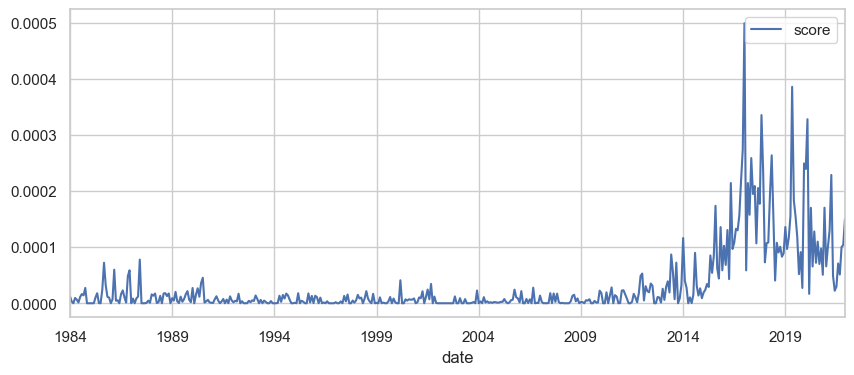

In [23]:
query = 'Generate an index with label artficial intelligence from 1984-01-02 to 2021-12-31'
generate = GenIndex(query=query, 
                    type=type, 
                    vector_data=wsj_openai, 
                    vector_column=vector_column, 
                    article_data=wsj_art, 
                    interval=interval, 
                    threshold=0.77,
                    alpha=0)
ai = generate.generate_emb()
ai.plot(figsize=(10,4))

Here is the query: 
{'label': 'blockchain advancements, evolution of blockchain technology, impact of blockchain on businesses, blockchain in finance sector, public and private blockchain, practical applications of blockchain, privacy concerns in blockchain transactions, famous blockchain platforms, effect of government regulations on blockchain development, educational opportunities in emerging field of blockchain', 'start_date': '1984-01-02', 'end_date': '2021-12-31'}
------------------------------------------------------------
Getting query vector...
------------------------------------------------------------
Computing cosine similarity with label embedding...


<Axes: xlabel='date'>

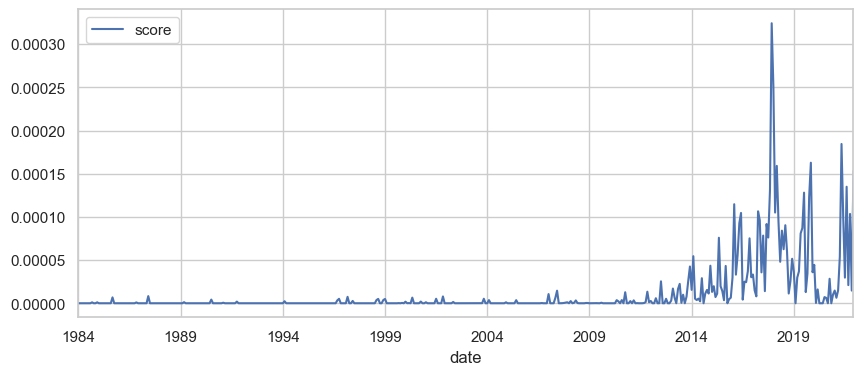

In [27]:
query = 'Generate an index with label blockchain from 1984-01-02 to 2021-12-31'
generate = GenIndex(query=query, 
                    type=type, 
                    vector_data=wsj_openai, 
                    vector_column=vector_column, 
                    article_data=wsj_art, 
                    interval=interval, 
                    threshold=0.77,
                    alpha=0)
blockchain = generate.generate_emb()
blockchain.plot(figsize=(10,4))

Here is the query: 
{'label': "Covid pandemic, coronavirus global outbreak, SARS-CoV-2 health crisis, worldwide medical emergency due to Covid-19, public health hazard from coronavirus infection, international struggle with Covid-19 disease, human fight against coronavirus pandemic, massive spread of Covid-19 globally, world's battle against SARS-CoV-2 virus", 'start_date': '1984-01-02', 'end_date': '2021-12-31'}
------------------------------------------------------------
Getting query vector...
------------------------------------------------------------
Computing cosine similarity with label embedding...


<Axes: xlabel='date'>

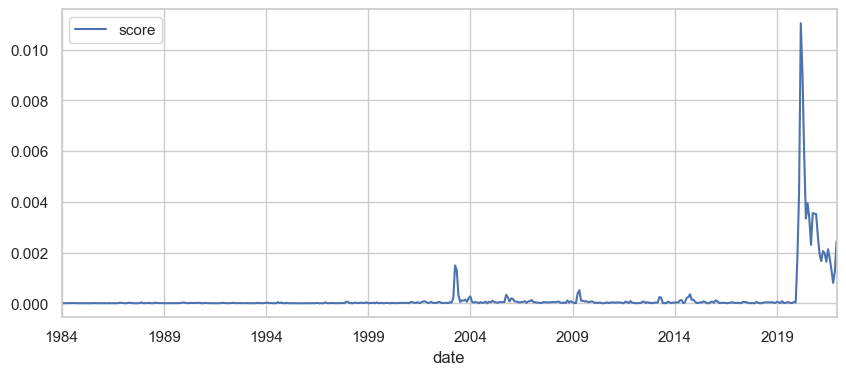

In [25]:
query = 'Generate an index with label covid from 1984-01-02 to 2021-12-31'
generate = GenIndex(query=query, 
                    type=type, 
                    vector_data=wsj_openai, 
                    vector_column=vector_column, 
                    article_data=wsj_art, 
                    interval=interval, 
                    threshold=0.77,
                    alpha=0)
covid = generate.generate_emb()
covid.plot(figsize=(10,4))

Here is the query: 
{'label': 'economic recession implications, global economic downturn, financial crisis aftermath, economic depression effects, recessionary periods analysis, worldwide financial instabilities, financial markets turmoil, sovereign debt crisis impacts, global recession repercussions', 'start_date': '1984-01-02', 'end_date': '2021-12-31'}
------------------------------------------------------------
Getting query vector...
------------------------------------------------------------
Computing cosine similarity with label embedding...
------------------------------------------------------------
Pearson Correlation with EPU: 0.6331637925146159
Spearman Correlation with EPU: 0.623163026571858


<Axes: xlabel='date'>

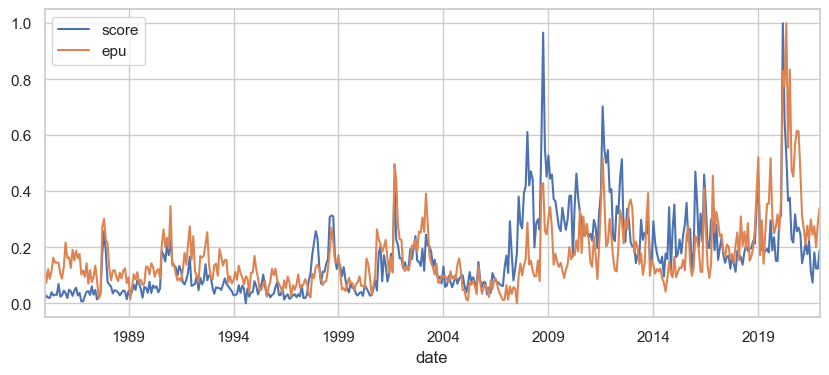

In [31]:
query = 'Generate an index with label economic recession from 1984-01-02 to 2021-12-31'
generate = GenIndex(query=query, 
                    type=type, 
                    vector_data=wsj_openai, 
                    vector_column=vector_column, 
                    article_data=wsj_art, 
                    interval=interval, 
                    threshold=0.77,
                    alpha=0)
recess = generate.generate_emb()
epu_official = pd.read_parquet(get_format_data() / 'epu.parquet.brotli')
recess = recess.join(epu_official).dropna()
scaler = MinMaxScaler(feature_range=(0, 1))
data_to_scale = recess[['score', 'epu']]
scaled_data = scaler.fit_transform(data_to_scale)
recess[['score', 'epu']] = scaled_data
print("-"*60)
pearson_corr = recess['score'].corr(recess['epu'], method='pearson')
spearman_corr = recess['score'].corr(recess['epu'], method='spearman')
print(f"Pearson Correlation with EPU: {pearson_corr}")
print(f"Spearman Correlation with EPU: {spearman_corr}")
recess[['score', 'epu']].plot(figsize=(10,4))